In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style("darkgrid")

In [2]:
radius = 1
# theta = np.random.uniform(0,2*math.pi)
steps = 300
finalR = []

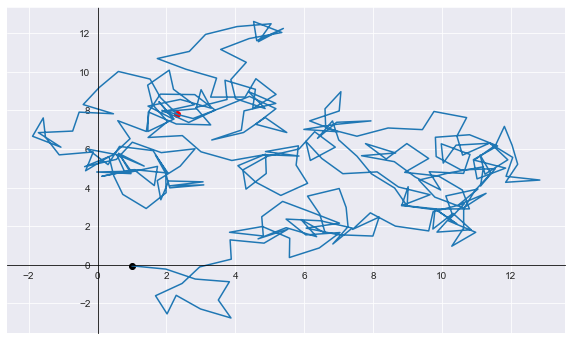

In [3]:
yArray = []
xAarray = []
for i in range(steps):
    theta = np.random.uniform(0,2*math.pi)
    xAarray.append(radius*np.cos(theta))
    yArray.append(radius*np.sin(theta))

trajectoryX = np.cumsum(xAarray)
trajectoryY= np.cumsum(yArray)
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(trajectoryX, trajectoryY)
ax.scatter(trajectoryX[0], trajectoryY[0], c = 'black')
ax.scatter(trajectoryX[-1], trajectoryY[-1], c = 'red')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

In [4]:
def random_walk(radius,steps):
    yArray = []
    xAarray = []
    for i in range(steps):
        theta = np.random.uniform(0,2*math.pi)
        xAarray.append(radius*np.cos(theta))
        yArray.append(radius*np.sin(theta))

    Radius = np.square(np.sum(xAarray)) + np.square(np.sum(yArray))

    return Radius


In [ ]:
radius = 1
steps = [2,5,10,20,50]
stepArray = []
Mcount = []
avgRadiusM = []
varRadiusM = []
checkvarR = np.inf
for step in steps:
    print("executing step {}".format(step))   
        
    iterCount = 2

    while iterCount < 100000 or checkvarR < 0.01:
        
        radiusM = []
        for i in range(iterCount):
            temp  = random_walk(radius,step)
            radiusM.append(temp)
        stepArray.append(step)
        Mcount.append(iterCount)
        avgRadiusM.append(np.mean(radiusM))
        checkvarR = np.std(radiusM)
        varRadiusM.append(checkvarR)
        checkvarR = varRadiusM[-1]/avgRadiusM[-1]
        iterCount = iterCount*2

    

In [ ]:
report = pd.DataFrame(data=list(zip(stepArray,Mcount,avgRadiusM,varRadiusM)), columns= ['timesteps','Mvalue','AvgRsquare','errorEstimate'])

Text(0.5, 1.0, 'Randomwalk')

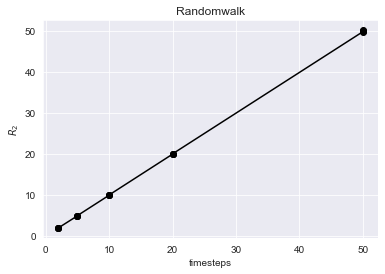

In [ ]:
plt.plot(report[report.Mvalue > 10000].timesteps,report[report.Mvalue > 10000].AvgRsquare, marker = 'o', color ='black')
plt.xlabel('timesteps')
plt.ylabel(r'$R_{2}$')
plt.title('Randomwalk')

In [ ]:
report[report.timesteps == 5]

,timesteps,Mvalue,AvgRsquare,errorEstimate
16,5,2,7.604896,2.365683
17,5,4,4.413221,3.394813
18,5,8,4.444048,5.823494
19,5,16,4.674003,4.038397
20,5,32,5.355666,5.887743
21,5,64,4.336706,3.778021
22,5,128,4.825614,4.336269
23,5,256,4.495267,3.970178
24,5,512,5.023398,4.289907
25,5,1024,5.116908,4.559138
